# Практическая работа №0: Краевая задача для уравнения II-го порядка.

Выполнил студент гр. 9382 Дерюгин Дмитрий, вариант 23.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения
### Задача Коши
 Задача Коши подразумевает поиск какого-либо частного решения уравнения $y=f(x)$, удовлетворяющим условиям
 
Общий вид задачи Коши:

$
    \begin{cases}
    f(x, y, y', y'', ...y^{(n)}) = 0\\
    y(x_0) = y_0\\
    y'(x_0) = y_1\\
    y''(x_0) = y_2\\
    ...\\
    y^{(n-1)}(x_0) = y_{n-1}\\
    \end{cases}
    $

## Постановка задачи

Дано дифференциальное уравнение:

$y"=f(x,y), a<x<b$  (1)

и граничные условия
$y(a) = y_a, y(b) = y_b$   (2)

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями

$y(a) = y_a, y'(a) = h$   (3)

План решения основан на многократном решении задачи Коши (1), (3).

Значение решения задачи Коши при 𝑥 = 𝑏 является функцией от h.

Задача сводится к отысканию такого значения переменной h, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b,h)=y_b$

Это уравнение с одним неизвестным h.
Для его решения можно применить стандартный метод половинного
деления.


## Выполнение работы

Есть уравнение: $y" = sin(x+y^2)$

Граничные условия:

$y(0) = 3\\
y(2) = -3$

Задача Коши:
$ \begin{cases}
y" = sin(x+y^2)\\
 y(0) = 3\\
 y'(0) = h
  \end{cases}$
  

Подключим все нужные библиотеки, а также объявим все переменные и функции. Возьмем $h_0=0$

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
ya = 3
yb = -3
a = 0
b = 2
h0 = 0
h1 = h0
y0 = y1 = None
epsilon = 0.001
X = np.arange(a, b, epsilon)


In [208]:
def f(Y,x):
    return [Y[1], np.sin(x+Y[0]**2)]

def main_func(h):
    res =  odeint(f, [ya, h], X)
    return [res, res[-1, 0]]

Найдем решение при заданной $h_0$

y(b, h0) = 2.655948207016522
h0 = 0


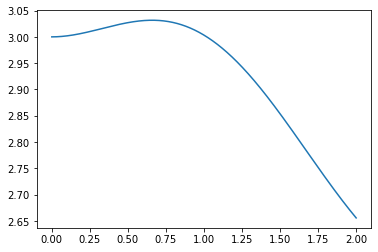

In [210]:
[res, y0] = main_func(h0)
plt.plot(X, res[:,0])
print(f'y(b, h0) = {y0}\nh0 = {h0}')

Получаем значение $y(b, h_0) > y_b$. Возьмем $\delta h = -0.001$ И будем искать $h_1 = h_1 + \Delta h\\$ до тех пор, пока 

$y(b, h_1) < y_b$

In [211]:
y1 = y0
while y1 > yb:
    h1 -= epsilon
    y1 = main_func(h1)[1]

Теперь методом половинного деления будем уменьшать отрезок $[y(b, h_1), y(b, h_0)]$ до тех пор, пока не выполнится неравенство:

$|y(b, h_0) - y(b, h_1)| < 0.001$

y(b, h) = -3.0015289400138068
h= -3.376793884277083


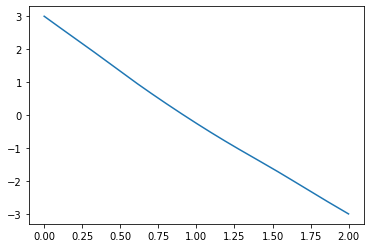

In [213]:
while (y0 - y1 > epsilon):
    mid = (h0 + h1)/2
    y_temp = main_func(mid)[1]
    if (y_temp < y0):
        y0 = y_temp
        h0 = mid
    else:
        y1 = y_temp
        h1 = mid
print(f'y(b, h) = {main_func((h0 + h1)/2)[1]}\nh= {(h0 + h1)/2}')
plt.plot(X, main_func((h0 + h1)/2)[0][:,0])

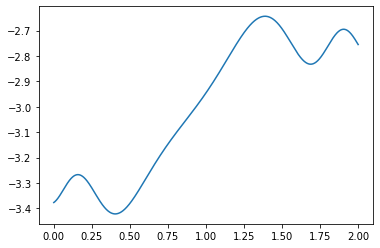

In [215]:
plt.plot(X, main_func((h0 + h1)/2)[0][:,1])

## Выводы

В результате данной работы была решена краевая задача для дифференциального уравнения второго порядка путем многократного решения задачи Коши. Эксперементальным путем была  найдена $h = -3.3768$, такая, что выполнено следующее условие: $y'(0) = h$